<a href="https://colab.research.google.com/github/glaylsonrs/Tarefa---Trilha-4/blob/main/an%C3%A1lise_fundos_resgates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 

<h1 align=left><font size = 8, style="color:rgb(200,0,0)"><b>Ciência de Dados </b></font></h1> 
<h1 align=left><font size = 5, style="color:rgb(0,0,0)"><b>Paradigmas de Linguagens de
Programação para Ciência de Dados</b></font></h1> 

# 4 Estudos de Caso de Análise de Dados I
Professores: *Diego Nogare* & *Rogério de Oliveira* 

<br>
<br>

---


# Exercícios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Base Fundos de Investimento em Ações - Anbima

Os dados abaixo foram obtidos da tabela mensal de fundos, posição abr/22, disponibilizada pela Anbima (Associação Brasileira das Entidades dos Mercados Financeiro e de Capitais) em seu site: https://www.anbima.com.br/pt_br/informar/estatisticas/fundos-de-investimento/fundos-de-investimento.htm). Com esses dados podemos saber qual a classe de fundos se destacou mais em 2022 em termos de rentabilidade. Além disso, podemos responder a perguntas como: os fundos que cobram taxa de performance realmente entregam melhores resultados? os fundos da classe de ações sustentabilidade têm retornos superiores aos demais, como documentado por diversos estudos? Qual a proporção de fundos de ações sustentáveis em relação aos demais? Também podemos plotar gráficos para verificar, por exemplo, como estão distribuídas as taxas de administração cobradas. 


In [ ]:
fia_outros = pd.read_excel("fia_outros.xlsx")
fia_sustentabilidade = pd.read_excel("fia_sustentabilidade.xlsx")
display(fia_outros.head())
display(fia_outros.tail())



,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
0,Ações Invest. no Exterior,1101001000 FIA - IE,REAL INVESTOR GESTAO DE RECURSOS LTDA,10.0,41888.89,1.02,-1.80,1.70,0.15,S,N
1,Ações Invest. no Exterior,1259 FIA IE,BTG PACTUAL,62.0,9606.26,0.73,-13.81,-11.96,0.15,S,N
2,Ações Invest. no Exterior,1421 NEW FIA IE,JGP GESTAO DE RECURSOS LTDA,2.0,21895.41,0.79,-9.57,-4.05,0.69,S,N
3,Ações Invest. no Exterior,2019RV1 FI ACOES IE,BTG PACTUAL,3.0,40157.61,0.94,-8.24,-0.69,0.70,N,S
4,Ações Invest. no Exterior,2555 FI AÇÕES IE,CREDIT SUISSE HEDGING-GRIFFO COR VAL S.A,3.0,75503.39,0.88,-7.21,-3.03,1.08,S,N


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
3577,Ações Índice Ativo,XP INVESTOR IBOVESPA ATIVO FC FIA,XP ASSET MANAGEMENT,3.0,49288.97,1.54,-5.84,9.08,2.5,N,S
3578,Ações Índice Ativo,XP INVESTOR IBOVESPA ATIVO MASTER FIA,XP ASSET MANAGEMENT,2.0,48449.70,1.76,-5.76,9.80,0.5,N,N
3579,Ações Índice Ativo,YALETOWN ACOES FUNDO DE INVESTIMENTO,BTG PACTUAL,3.0,4667.80,7.16,-9.48,-1.72,1.0,S,S
3580,Ibovespa,NaN,NaN,NaN,NaN,NaN,-10.10,2.91,0.0,NaN,N
3581,ISE,NaN,NaN,NaN,NaN,NaN,-10.17,-3.16,0.0,NaN,N


As últimas duas linhas do primeiro DataFrame foram reservadas para índices de mercado, para que sirvam de parâmetro, quando se for analisar a rentabilidade dos fundos.

In [ ]:
display(fia_sustentabilidade.head())

,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
0,Ações Sustentabilidade/Governança,BB ACOES SUSTENTABILIDADE FIC FIA,BB DTVM S.A,3,23599.52,"2,97",-10.24,-2.02,1.0,N,N
1,Ações Sustentabilidade/Governança,BB AÇÕES ASG BRASIL FC,BB DTVM S.A,2,7828.93,"0,82",-8.71,-1.25,1.0,N,S
2,Ações Sustentabilidade/Governança,BB AÇÕES GOVERNANÇA FI,BB DTVM S.A,3,952137.33,"2,86",-10.04,2.65,1.0,N,N
3,Ações Sustentabilidade/Governança,BRAD PRIME FIC FIA IND SUST EMPRESARIAL,BRADESCO,3,4493.69,"2,85",-8.10,-0.56,1.5,N,N
4,Ações Sustentabilidade/Governança,BRADESCO FIA SUSTENTABILIDADE EMPRESARIA,BRADESCO,3,24558.52,"2,26",-9.68,-1.05,1.5,N,N


In [ ]:
#Temos dois DataFrames com os mesmos atributos, daí, faremos uma concatenação no sentido das linhas
fias = pd.concat([fia_outros,fia_sustentabilidade], axis = 0).reset_index(drop=True)

print(fias.shape)

display(fias.head(3))
display(fias.tail(3))


(3622, 11)


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
0,Ações Invest. no Exterior,1101001000 FIA - IE,REAL INVESTOR GESTAO DE RECURSOS LTDA,10.0,41888.89,1.02,-1.80,1.70,0.15,S,N
1,Ações Invest. no Exterior,1259 FIA IE,BTG PACTUAL,62.0,9606.26,0.73,-13.81,-11.96,0.15,S,N
2,Ações Invest. no Exterior,1421 NEW FIA IE,JGP GESTAO DE RECURSOS LTDA,2.0,21895.41,0.79,-9.57,-4.05,0.69,S,N


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
3619,Ações Sustentabilidade/Governança,WA AÇÕES SUSTENT EMPRESARIAL FIC DE FI,WESTERN ASSET,3.0,12139.73,"0,41",-10.39,-4.27,4.0,N,N
3620,Ações Sustentabilidade/Governança,WA SUSTENTABILIDADE EMPRESARIAL FIA,WESTERN ASSET,3.0,12111.15,"1,38",-10.25,-3.64,2.0,N,N
3621,Ações Sustentabilidade/Governança,Western Asset FIA BDR ESG Leaders Nivel,WESTERN ASSET,4.0,16863.11,"843,16",-7.22,-15.68,1.5,N,N


In [ ]:
fias[fias.Restrito == "S"].count()/len(fias)

classe                       0.271949
fundo                        0.271949
gestor                       0.271949
prazo_pgto_resgate           0.271949
patrimonio_mil               0.271949
cota                         0.271949
rentabilidade_perc_abr_22    0.271673
rentabilidade_perc_ano_22    0.271397
taxa_adm                     0.270845
Restrito                     0.271949
tx_perform                   0.271949
dtype: float64

Observa-se que 27% dos fundos da base são restritos, ou seja, fundos que não são acessíveis ao investidores em geral. 

In [ ]:
#Seguiremos com uma nova base modificada, excluindo os fundos restritos
fias = fias[fias.Restrito == "N"]
fias.head()


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
3,Ações Invest. no Exterior,2019RV1 FI ACOES IE,BTG PACTUAL,3.0,40157.61,0.94,-8.24,-0.69,0.70,N,S
7,Ações Invest. no Exterior,3 V FUNDO DE INVESTIMENTO EM AÇÕES IE,JULIUS BAER FAMILY OFFICE BRASIL LTDA,34.0,24795.37,2.35,-7.18,-1.63,0.31,N,N
8,Ações Invest. no Exterior,333 FI ACOES IE,SONATA GESTORA DE RECURSOS LTDA,2.0,140243.06,1.35,-9.17,-0.61,0.47,N,N
9,Ações Invest. no Exterior,3AX-B FI ACOES IE,BTG PACTUAL,5.0,61465.37,195.39,-8.50,-2.22,0.10,N,N
10,Ações Invest. no Exterior,3KB FI ACOES INV EXT,4K INVESTIMENTOS LTDA,62.0,9856.97,0.88,-9.52,-4.22,0.15,N,N


# Qualidade dos Dados

Verificação dos tipos associados às variáveis

In [ ]:
print(fias.dtypes)

classe                        object
fundo                         object
gestor                        object
prazo_pgto_resgate           float64
patrimonio_mil               float64
cota                          object
rentabilidade_perc_abr_22    float64
rentabilidade_perc_ano_22    float64
taxa_adm                     float64
Restrito                      object
tx_perform                    object
dtype: object


##Verificação do percentual de valores ausentes por atributo.

In [ ]:
display(fias.isnull().sum()/len(fias))

classe                       0.000000
fundo                        0.000000
gestor                       0.000000
prazo_pgto_resgate           0.000000
patrimonio_mil               0.000000
cota                         0.000000
rentabilidade_perc_abr_22    0.001139
rentabilidade_perc_ano_22    0.003795
taxa_adm                     0.016698
Restrito                     0.000000
tx_perform                   0.000000
dtype: float64

A inspeção inicial mostra que a base é composta por dados de 11 atributos de fundos de investimentos em ações. 

Observa-se que 3 dos 11 atributos apresentam dados ausentes, sendo o atributo taxa_adm o que possui a maior quantidade desses dados (1,67%), o que decorre do fato de alguns fundos não apresentarem essa taxa. Em seguida vem o atributo rentabilidade_perc_ano_22 (0,38%), sugerindo que há fundos com menos de um ano de criação, pois, a regulação prescreve que fundos só podem divulgar dados de rentabilidade após completarem 12 meses de existência.

Neste caso, como são poucos os valores ausentes e esses não poderão entrar nas análises comparativas, podemos excluir as linhas com valores ausentes.

In [ ]:
#Excluindo linhas de valores ausentes para permitir a construção de box-plots adiante
fias = fias[ ~ np.isnan(fias.rentabilidade_perc_ano_22)] 

In [ ]:
fias.describe()

,prazo_pgto_resgate,patrimonio_mil,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm
count,2625.000000,2.625000e+03,2625.000000,2625.000000,2581.000000
mean,20.742857,1.857730e+05,-7.780301,-5.058324,120.214594
std,37.680012,5.442344e+05,4.512342,11.556390,2369.984611
min,0.000000,0.000000e+00,-71.500000,-98.880000,0.000000
25%,3.000000,1.245609e+04,-10.250000,-9.970000,0.450000
50%,6.000000,4.366257e+04,-8.260000,-2.480000,1.500000
75%,32.000000,1.548034e+05,-5.270000,2.820000,2.000000
max,542.000000,1.271250e+07,25.100000,67.820000,83000.000000


Alguns dados chamaram atenção, como a dispersão dos dados de rentabilidade, podendo variar de -71,5% a 25,1% no mês e de -98,88% a 67,82% no ano.
Há indícios de outliers no atributo taxa_adm. Verificou-se que números a partir de dois dígitos se referem a taxas cobradas em (R$), e não em (%). Como a documentação da base de dados não informa a periodicidade dessa cobrança, verificaremos adiante a possibilidade de remoção desses valores extremos. 

##Exploração dos dados

In [ ]:
#Podemos estar interessados em saber qual o valor total por gestor investido nos fundos de ações  
fias.groupby('gestor')['patrimonio_mil'].sum()


gestor
3G RADAR GESTORA DE RECURSOS LTDA           2160301.80
3R GESTORA DE RECURSOS LTDA                   65007.56
4K INVESTIMENTOS LTDA                         40226.71
4UM GESTÃO DE RECURSOS LTDA                  656487.28
ABRADINVEST GESTAO DE RECURSOS                89311.52
                                               ...    
ZENITH ASSET MANAGEMENT LTDA                 201291.04
ZERO CINCO UM CAPITAL GESTÃO DE RECURSOS     160890.63
 LATINOAMERICANA DE INVESTIM E CAP LTDA        9897.08
ÁFIRA GESTÃO DE RECURSOS LTDA                  3069.84
ÁLAMOS ADMINISTRADORA DE RECURSOS LTDA         1984.07
Name: patrimonio_mil, Length: 376, dtype: float64

In [ ]:
print('Estatísticas descritivas do grupo de fundos de ações, exceto sustentabilidade')
fia_outros.describe()

Estatísticas descritivas do grupo de fundos de ações, exceto sustentabilidade


,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm
count,3580.000000,3.580000e+03,3.580000e+03,3578.000000,3570.000000,3535.000000
mean,23.319553,1.906108e+05,3.803297e+03,-7.931126,-4.310392,165.065715
std,76.165968,5.663642e+05,1.244339e+05,4.769637,11.387701,2555.409129
min,0.000000,0.000000e+00,1.000000e-02,-79.570000,-98.880000,0.000000
25%,3.000000,1.342477e+04,9.800000e-01,-10.380000,-8.720000,0.260000
50%,5.000000,4.514997e+04,2.040000e+00,-8.390000,-2.200000,1.000000
75%,32.000000,1.523262e+05,1.435250e+01,-5.420000,2.817500,2.000000
max,1802.000000,1.271250e+07,5.505341e+06,31.090000,134.240000,83000.000000


In [ ]:
print('Estatísticas descritivas do grupo de fundos de ações sustentabilidade')
fia_sustentabilidade.describe()

Estatísticas descritivas do grupo de fundos de ações sustentabilidade


,prazo_pgto_resgate,patrimonio_mil,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm
count,40.000000,40.000000,40.00000,40.000000,39.000000
mean,12.100000,57179.821250,-9.30850,-3.661250,15.303949
std,14.795703,151727.421244,1.52327,4.081095,85.864522
min,2.000000,1556.540000,-11.67000,-15.680000,0.004000
25%,3.000000,7126.180000,-10.07250,-7.422500,0.850000
50%,3.000000,20111.495000,-9.79000,-2.945000,1.500000
75%,25.250000,45266.247500,-9.51250,-0.545000,2.125000
max,62.000000,952137.330000,-5.27000,3.570000,537.750000


Embora o período de tempo seja curto para se chegar a uma conclusão quanto à performance dos fundos, temos para o ano que os fundos ASG apresentaram, em média, uma rentabilidade superior aos demais fundos de ações, corroborando evidências documentadas de que os fundos que levam em conta aspectos ASG (Ambiental, Social e Governança) tendem a entregar uma melhor performance. Por outro lado, no mesmo período, a mediana favorece o desempenho dos demais fundos. Daí a importância de se considerar uma série mais longa, bem como selecionar itens razoavelmente comparáveis, por exemplo, fazer comparativo entre fundos do mesmo gestor.   

In [ ]:
fia_outros.groupby('gestor')['rentabilidade_perc_ano_22'].mean()

gestor
3G RADAR GESTORA DE RECURSOS LTDA           10.003333
3R GESTORA DE RECURSOS LTDA                  8.110000
4K INVESTIMENTOS LTDA                       -4.515000
4UM GESTÃO DE RECURSOS LTDA                 -4.001000
A10 INVESTIMENTOS                           35.750000
                                              ...    
ZENITH ASSET MANAGEMENT LTDA                -3.124286
ZERO CINCO UM CAPITAL GESTÃO DE RECURSOS    -9.475714
 LATINOAMERICANA DE INVESTIM E CAP LTDA      1.470000
ÁFIRA GESTÃO DE RECURSOS LTDA               -1.450000
ÁLAMOS ADMINISTRADORA DE RECURSOS LTDA      -2.490000
Name: rentabilidade_perc_ano_22, Length: 428, dtype: float64

In [ ]:
fia_sustentabilidade.groupby('gestor')['rentabilidade_perc_ano_22'].mean()

gestor
BANCO SANTANDER (BRASIL) SA           -3.575000
BB DTVM S.A                           -0.206667
BRADESCO                              -1.735000
CAIXA ASSET                           -3.150000
FUNCEF                                -1.290000
ITAU UNIBANCO ASSET MANAGEMENT LTDA   -0.350000
ITAU UNIBANCO SA                      -2.383333
JGP GESTAO DE RECURSOS LTDA           -7.493333
PLURAL                                -8.460000
SAFRA                                 -0.337500
SICREDI                               -1.550000
VITREO GESTÃO DE RECURSOS LTDA        -6.440000
WESTERN ASSET                         -7.863333
Name: rentabilidade_perc_ano_22, dtype: float64

Dentre os fundos sustentabilidade, destaque para os geridos pela BB DTVM, cuja rentabilidade média no ano ficou muito próxima da estabilidade (-0,21%), enquanto os fundos sustentabilidade da Western registraram queda de 7,86%.

In [ ]:
#podemos verificar qual a proporção dos fundos com aspectos ASG em relação ao total de fundos
print(f'Percentual de fundos sustentabilidade = { len(fia_sustentabilidade) / len(fias) :.2f} %')

Percentual de fundos sustentabilidade = 0.02 %


In [ ]:
#Podemos estar interessados em saber qual classe de fundos apresentou a maior rentabilidade no ano, em média
fias.groupby('classe')['rentabilidade_perc_ano_22'].mean()


classe
Ações Dividendos                      5.852857
Ações Indexados                       1.412167
Ações Invest. no Exterior           -18.629031
Ações Livre                          -2.512846
Ações Small Caps                     -0.549778
Ações Sustentabilidade/Governança    -3.722051
Ações Valor/Crescimento              -5.315680
Ações Índice Ativo                    2.522951
Name: rentabilidade_perc_ano_22, dtype: float64

Destaque positivo para os fia dividendos, enquanto os fias com investimento no exterior foram os mais penalizados em 2022.

# Ranking dos fundos em termos de rentabilidade


In [ ]:
fias_top5_ano = fias.nlargest(5, 'rentabilidade_perc_ano_22')
fias_top5_ano


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
2474,Ações Livre,QUANTUM FI EM AÇÕES,OLIVEIRA TRUST DTVM,0.0,416069.31,6661.35,7.75,67.82,14000.00,N,N
3496,Ações Índice Ativo,MOBI FUNDO DE INVESTIMENTO EM AÇÕES IE,BTG PACTUAL,2.0,3240851.93,3.29,-11.64,44.92,83000.00,N,N
780,Ações Invest. no Exterior,SIROS FI ACOES IE,TARPON GESTORA DE RECURSOS S.A,5.0,107746.48,2.07,1.96,43.94,2.00,N,S
375,Ações Invest. no Exterior,GLASGOW FI ACOES IE,BTG PACTUAL,14.0,17394.60,2.25,-14.58,34.90,0.70,N,S
2105,Ações Livre,LEGO FIA,LANX CAPITAL,1.0,84178.37,1.3,-5.02,29.63,1.08,N,S


In [ ]:
fias_top5_mes = fias.nlargest(5, 'rentabilidade_perc_abr_22')
fias_top5_mes

,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
1058,Ações Livre,051 CAJUINA ALPHA FI ACOES,ZERO CINCO UM CAPITAL GESTÃO DE RECURSOS,4.0,17267.45,1.4,25.10,0.12,0.100,N,N
1777,Ações Livre,FUNDO DE INVESTIMENTO EM AÇÕES AUDAX,AGUILA CAPITAL ADM E GESTÃO DE CAPITAIS,5.0,1321.85,1.2,13.58,23.38,1.880,N,S
2781,Ações Livre,TI HEDGE FUNDO DE INVESTIMENTO DE ACOES,KÍNITRO CAPITAL GES DE REC D TERC LTDA,2.0,2762.14,1.27,12.52,4.57,2.000,N,N
3045,Ações Livre,XINGO FUNDO DE INVESTIMENTO DE ACOES,3G RADAR GESTORA DE RECURSOS LTDA,3.0,215216.79,1.88,11.12,26.18,0.000,N,N
3044,Ações Livre,XINGO FIC FI ACOES 360,3G RADAR GESTORA DE RECURSOS LTDA,362.0,182415.34,1.8,10.52,24.83,0.045,N,S


# Distribuição dos Dados

O gráfico abaixo mostra como estão distribuídos os fundos de ações por classe. Observa-se uma grande concentração da classe de fundos de ações livres, bem como, um mercado ainda bem incipiente no Brasil em termos de oferta de opções de investimentos atrelados à sustentabilidade.

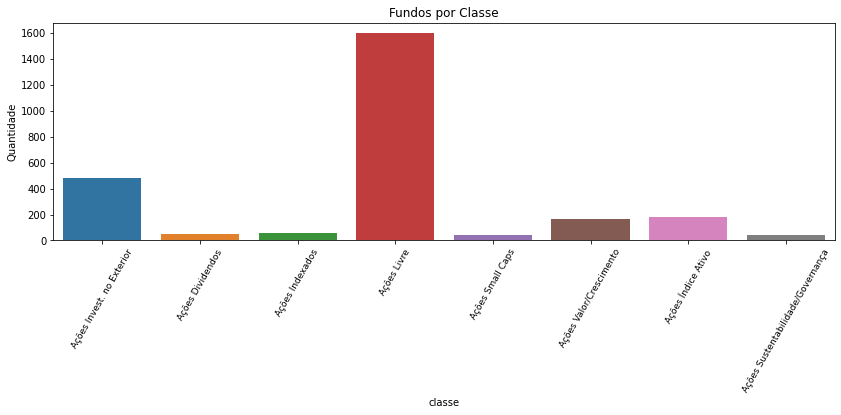

In [ ]:
pd.DataFrame(fias.value_counts()).reset_index()
plt.figure(figsize=(14,4))
sns.countplot(x=fias.classe)
plt.title('Fundos por Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=60, size=9)
plt.show()

Podemos estar interessados em descobrir qual a distribuição das taxas de administração dos fundos, pelo que plotaremos um histograma dessa taxas.

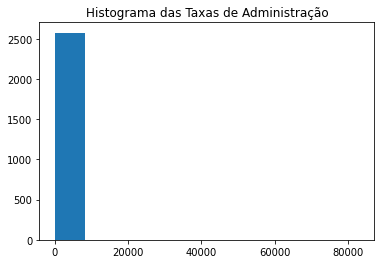

In [ ]:
plt.hist(fias['taxa_adm'])
plt.title('Histograma das Taxas de Administração')
plt.show()


Como se poderia inferir das estatísticas, os valores de taxas de administração não estão padronizados. Com alguns poucos fundos cobrando taxas de valores acima de três casas. Em notas da base de dados, verifica-se que alguns fundos cobram taxas na forma monetária, ao invés de percentual como amplamente difundido nessa indústria.

In [ ]:
#Assim, removeremos da base esses valores, uma vez que a taxa de administração dificilmente chegará a 5%.
fias_ajust = fias[fias.taxa_adm < 10.0]
print(fias_ajust.shape)
fias_ajust.head(3)

(2538, 11)


,classe,fundo,gestor,prazo_pgto_resgate,patrimonio_mil,cota,rentabilidade_perc_abr_22,rentabilidade_perc_ano_22,taxa_adm,Restrito,tx_perform
3,Ações Invest. no Exterior,2019RV1 FI ACOES IE,BTG PACTUAL,3.0,40157.61,0.94,-8.24,-0.69,0.70,N,S
7,Ações Invest. no Exterior,3 V FUNDO DE INVESTIMENTO EM AÇÕES IE,JULIUS BAER FAMILY OFFICE BRASIL LTDA,34.0,24795.37,2.35,-7.18,-1.63,0.31,N,N
8,Ações Invest. no Exterior,333 FI ACOES IE,SONATA GESTORA DE RECURSOS LTDA,2.0,140243.06,1.35,-9.17,-0.61,0.47,N,N


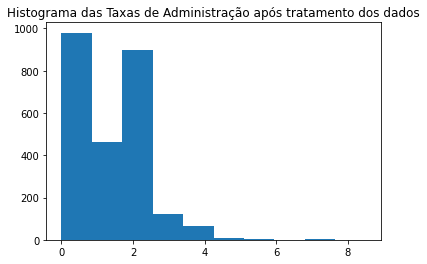

In [ ]:
plt.hist(fias_ajust['taxa_adm'])
plt.title('Histograma das Taxas de Administração após tratamento dos dados')
plt.show()

Vemos que as taxas de administração se concentram entre 0 e 2%.

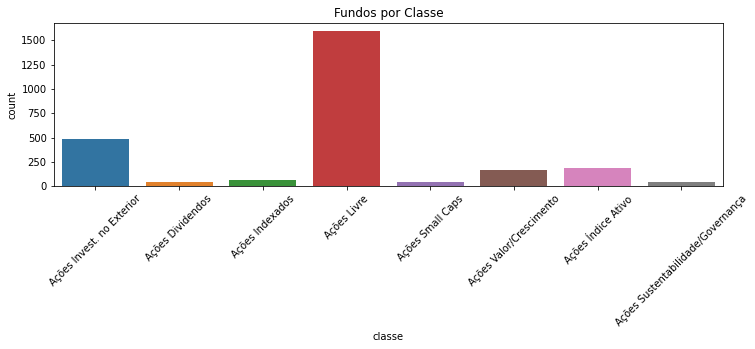

In [ ]:
pd.DataFrame(fias.classe.value_counts()).reset_index()[1:30]
plt.figure(figsize=(12,3))
sns.countplot(x=fias.classe)
plt.title('Fundos por Classe')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.DataFrame(fias.classe.value_counts()).reset_index()

,index,classe
0,Ações Livre,1595
1,Ações Invest. no Exterior,485
2,Ações Índice Ativo,183
3,Ações Valor/Crescimento,169
4,Ações Indexados,60
5,Ações Dividendos,49
6,Ações Small Caps,45
7,Ações Sustentabilidade/Governança,39


Verifica-se a dominância de fundos de ações da classe 'Ações Livre', com quase de 1600 fundos, seguida por fundos "Ações Invest. Exterior'. Por outro, apesar da crescente discussão acerca de investimentos sustentáveis, observam-se apenas 39 fundos com essa característica.

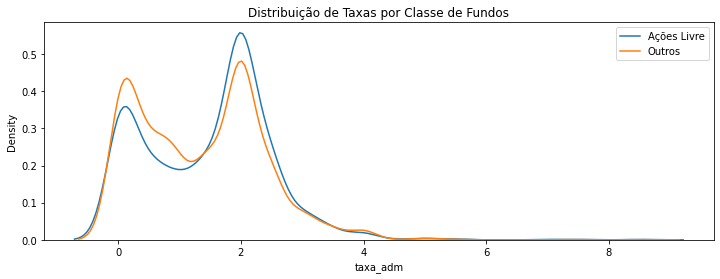

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(fias_ajust[fias_ajust.classe == 'Ações Livre'].taxa_adm,label='Ações Livre')
sns.kdeplot(fias_ajust.taxa_adm,label='Outros')
plt.title('Distribuição de Taxas por Classe de Fundos')
plt.legend()
plt.show()

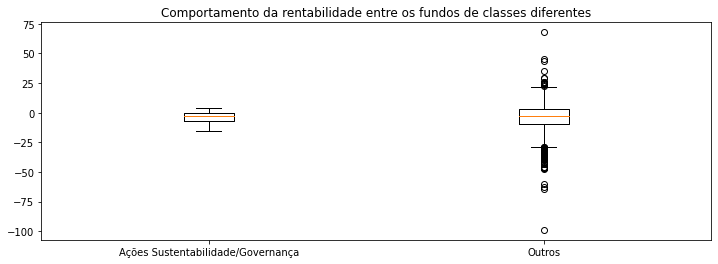

In [ ]:
fias_not_null = fias[ ~ np.isnan( fias.rentabilidade_perc_ano_22 ) ] 
plt.figure(figsize=(12,4))
plt.boxplot(fias_not_null[fias_not_null.classe == 'Ações Sustentabilidade/Governança'].rentabilidade_perc_ano_22,positions=[1])
plt.boxplot(fias_not_null[fias_not_null.classe != 'Ações Sustentabilidade/Governança'].rentabilidade_perc_ano_22,positions=[2])
plt.title('Comportamento da rentabilidade entre os fundos de classes diferentes')
plt.xticks(ticks=[1,2], labels=['Ações Sustentabilidade/Governança','Outros'])
plt.show()


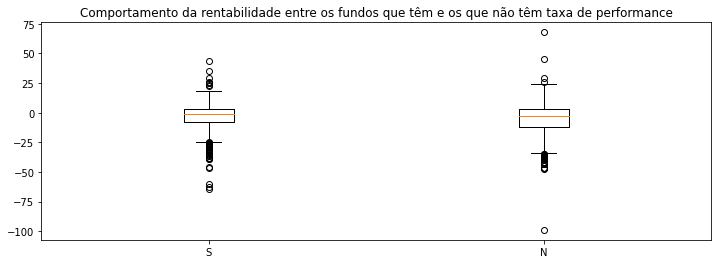

In [ ]:
fias_not_null = fias[ ~ np.isnan( fias.rentabilidade_perc_ano_22 ) ] 
plt.figure(figsize=(12,4))
plt.boxplot(fias_not_null[fias_not_null.tx_perform == 'S'].rentabilidade_perc_ano_22,positions=[1])
plt.boxplot(fias_not_null[fias_not_null.tx_perform == 'N'].rentabilidade_perc_ano_22,positions=[2])
plt.title('Comportamento da rentabilidade entre os fundos que têm e os que não têm taxa de performance')
plt.xticks(ticks=[1,2], labels=['S','N'])
plt.show()

Os fundos que cobram taxa de performance apresentam uma menor dispersão de rentabiliade 

# Relações

Qual será a relação entre a rentabilidade observada no ano e a taxa de administração cobrada pelos gestores dos fundos?  

In [ ]:
# Calculando a correlação entre a rentabilidade e o nível de taxa de administração, bem como observando o gráfico de dispersão,
#chegamos à conclusão de que esses atributos tem uma relação linear baixa, embora positiva, como esperado. 

[[1.         0.23322224]
 [0.23322224 1.        ]]


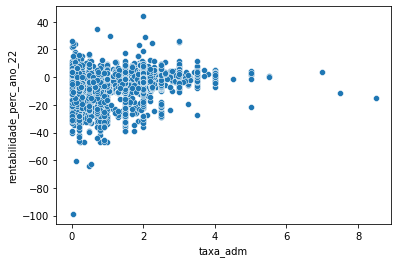

In [ ]:
print(np.corrcoef(fias_ajust.taxa_adm, fias_ajust.rentabilidade_perc_ano_22 ))
sns.scatterplot(x=fias_ajust.taxa_adm, y= fias_ajust.rentabilidade_perc_ano_22)

É de se esperar que fundos que cobram taxa de performance empreendam mais esforços e entreguem melhores resultados aos seus cotistas. A partir do código abaixo, confirmamos essa hipótese para o acumulado do ano de 2022.

In [ ]:
fias.groupby('tx_perform')['rentabilidade_perc_ano_22'].mean()

tx_perform
N   -6.408722
S   -3.159597
Name: rentabilidade_perc_ano_22, dtype: float64

Hipoteticamente, fundos com maior patrimonio conseguem diluir seus custos e assim propiciar uma maior rentabilidade a seus cotistas. Visando testar essa hipótese, calcularemos a correlação entre esses dois atributos e após plotaremos um gráfico de dispersão.

[[1.         0.03141562]
 [0.03141562 1.        ]]


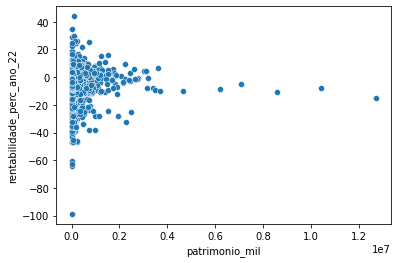

In [ ]:
print(np.corrcoef(fias_ajust.patrimonio_mil, fias_ajust.rentabilidade_perc_ano_22 ))
sns.scatterplot(x=fias_ajust.patrimonio_mil, y= fias_ajust.rentabilidade_perc_ano_22)

A correlação e o gráfico de dispersão sugerem que o tamanho do PL não parece ser tão relevante para explicar o desempenho dos fundos. 

##Conclusões
A classe de fundos de ações que mais se destacou em 2022 em termos de rentabilidade foi a de Dividendos, podendo ser um indício de que em momentos de incertezas e de volatilidade como o atual, seja mais adequado acreditar em empresas consolidadas e com bom histórico de resultados e pagamento de proventos. Após análise dos dados, também foi observado que os fundos que cobram taxa de performance realmente estão entregando, na média, melhores resultados que os demais. Por meio de histogramas  observamos como estão distribuídas as taxas de administração cobradas. POr fim, contrariando boa parte da literatura, os fundos da classe de ações sustentabilidade não performaram até maio de 2022 melhor que os demais fundos. Contudo, reconhecemos que o período de análise é muito curto, o que pode levar a conclusões precipitadas e até mesmo equivocadas. 